<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300_%ED%9A%8C%EA%B7%80%EC%97%B0%EC%8A%B5c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 우리나라의 행복지수는 몇 위? 아니, 행복지수가 도대체 뭔데?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 World Happiness Report up to 2020을 사용합니다.
    
    - 다음 6개의 csv 파일을 사용합니다.
    2015.csv
    2016.csv
    2017.csv
    2018.csv
    2019.csv
    2020.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY'] = '50ef5cd85c486772c23beb302ab99e32'

In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d mathurinache/world-happiness-report
!unzip '*.zip'

  0% 0.00/53.9k [00:00<?, ?B/s]
100% 53.9k/53.9k [00:00<00:00, 20.5MB/s]
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                


In [5]:
# 여러 개의 csv, Pandas로 읽어들이기
df = dict()
df['2015'] = pd.read_csv('/content/2015.csv')
df['2016'] = pd.read_csv('/content/2016.csv')
df['2017'] = pd.read_csv('/content/2017.csv')
df['2018'] = pd.read_csv('/content/2018.csv')
df['2019'] = pd.read_csv('/content/2019.csv')
df['2020'] = pd.read_csv('/content/2020.csv')

In [6]:
df['2015'].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
# 년도별 데이터 표준화하기
for key in df:
  print(key, df[key].columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [8]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화하기
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [9]:
df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True)

In [11]:
df['2016'].drop([ 'Region', 'Happiness Rank', 
       'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

In [12]:
df['2017'].drop(['Happiness.Rank', 'Whisker.high',
       'Whisker.low'], axis=1, inplace=True) # generosity, tust 순서 반대


In [13]:
df['2018'].drop(['Overall rank'], axis=1,inplace=True) # generosity, trust 순서 반대, residual 없음 

In [14]:
df['2019'].drop(['Overall rank'],axis=1,inplace=True)# generosity, trust 순서 반대, residual 없음 

In [15]:
df['2020'].drop([ 'Regional indicator',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True) # generosity, tust 순서 반대

In [16]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

In [17]:
df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

In [18]:
df['2019'].head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,residual
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [19]:
# generosity, trust 순서 반대인 것들 바꾸기
df['2015'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 
       'Generosity','Trust (Government Corruption)', 'Dystopia Residual']]

In [21]:
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 
       'Generosity','Trust (Government Corruption)', 'Dystopia Residual']]

In [22]:
for key in df:
  print(key, df[key].columns)

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [23]:
for col_name in df:
  df[col_name].columns = cols

In [24]:
df['2016']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596
...,...,...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2.10812
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2.14558
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587,2.13540
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233,0.81789


In [26]:
# 여러 개의 csv 데이터 프레임 하나의 데이터 프레임으로 합치기
df_all = pd.concat(df, axis=0)
df_all

country   score  ...     trust  residual
2015 0                 Switzerland  7.5870  ...  0.419780  2.517380
     1                     Iceland  7.5610  ...  0.141450  2.702010
     2                     Denmark  7.5270  ...  0.483570  2.492040
     3                      Norway  7.5220  ...  0.365030  2.465310
     4                      Canada  7.4270  ...  0.329570  2.451760
...                            ...     ...  ...       ...       ...
2020 148  Central African Republic  3.4759  ...  0.028265  2.860198
     149                    Rwanda  3.3123  ...  0.485542  0.548445
     150                  Zimbabwe  3.2992  ...  0.080929  0.841031
     151               South Sudan  2.8166  ...  0.111157  1.378751
     152               Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [27]:
df_all.index.names = ['year', 'rank']
df_all

country   score  ...     trust  residual
year rank                                    ...                    
2015 0                  Switzerland  7.5870  ...  0.419780  2.517380
     1                      Iceland  7.5610  ...  0.141450  2.702010
     2                      Denmark  7.5270  ...  0.483570  2.492040
     3                       Norway  7.5220  ...  0.365030  2.465310
     4                       Canada  7.4270  ...  0.329570  2.451760
...                             ...     ...  ...       ...       ...
2020 148   Central African Republic  3.4759  ...  0.028265  2.860198
     149                     Rwanda  3.3123  ...  0.485542  0.548445
     150                   Zimbabwe  3.2992  ...  0.080929  0.841031
     151                South Sudan  2.8166  ...  0.111157  1.378751
     152                Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [28]:
df_all.reset_index(inplace=True)
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,0,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,1,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,2,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,3,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,4,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [29]:
df_all['rank'] += 1
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [31]:
# Pivot을 이용해 데이터프레임 재구성하기
rank_table = pd.pivot(data=df_all, index='country', columns='year', values='rank')
rank_table.sort_values(by='2020', inplace=True)
rank_table.head()

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0


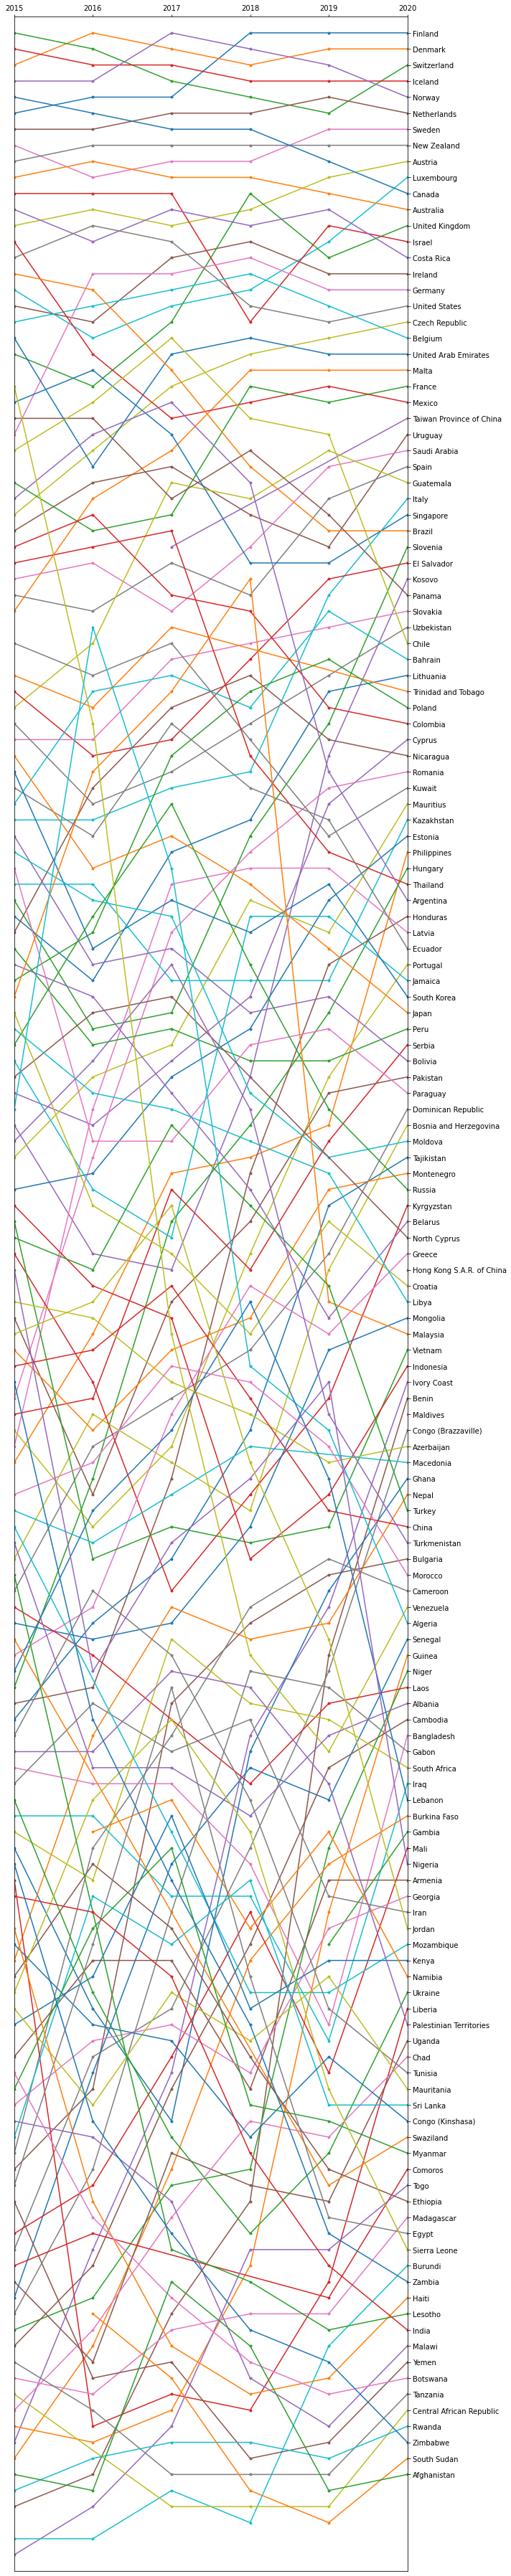

In [56]:
# 데이터 시각화 수행하기
# 년도별 순위 변화 시각화하기
fig = plt.figure(figsize=(10, 50))
rank2020 = rank_table['2020'].dropna()
for c in rank2020.index:
  t = rank_table.loc[c].dropna()
  plt.plot(t.index, t, '.-')

plt.yticks(rank2020, rank2020.index)
plt.xlim(['2015',  '2020'])
plt.ylim([0, rank_table.max().max() + 1])

ax = plt.gca()
ax.invert_yaxis()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.xaxis.tick_top()
plt.tight_layout()
plt.show()

In [57]:
# 분야별로 나누어 점수 시각화하기
df_all.columns

Index(['year', 'rank', 'country', 'score', 'economy', 'family', 'health',
       'freedom', 'generosity', 'trust', 'residual'],
      dtype='object')

In [60]:
data = df_all[df_all['year'] == '2020']
data = data.loc[data.index[:20]]
data

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
782,2020,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
783,2020,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
784,2020,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
785,2020,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
786,2020,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
787,2020,6,Netherlands,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
788,2020,7,Sweden,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
789,2020,8,New Zealand,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
790,2020,9,Austria,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
791,2020,10,Luxembourg,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [64]:
d = data[data.columns[4:]].cumsum(axis=1)

In [65]:
d = d[d.columns[::-1]]

In [66]:
d

,residual,trust,generosity,freedom,health,family,economy
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207
787,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946
788,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235
789,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318
790,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286
791,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676


In [68]:
d['country'] = data['country']
d

,residual,trust,generosity,freedom,health,family,economy,country
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190,Finland
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949,Denmark
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774,Switzerland
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502,Iceland
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207,Norway
787,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946,Netherlands
788,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235,Sweden
789,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318,New Zealand
790,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286,Austria
791,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676,Luxembourg


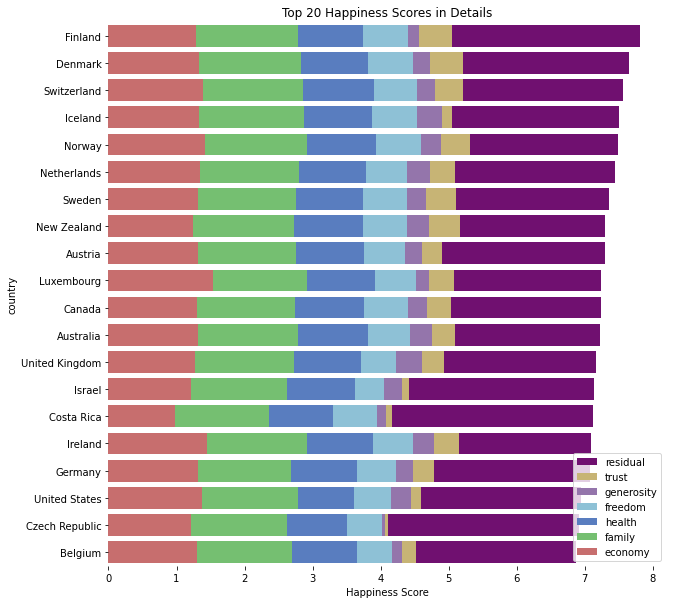

In [71]:
fig = plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'purple'][::-1]
sns.set_color_codes('muted')
for idx, c in enumerate(d.columns[:-1]):
  sns.barplot(data=d, x=c, y='country', label=c, color=colors[idx])

plt.legend(loc ='lower right')
plt.title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom=True)